# Transforming Density Funcs

See:
* https://www.cl.cam.ac.uk/teaching/2003/Probability/prob11.pdf
* https://github.com/jbailinua/probability/blob/master/Transformation%20of%20Probability%20-%20Generating%20Distributions.ipynb

I'm not actually sure that I've done this in the best way...

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

In [3]:
%run ~/.jupyter/config.ipy

# Transforming density funcs

Imaging we have some distribution, $P(x)$, that we want to transform into another $Q(x')$. Some reasons for this - $P$ could be the distribution of lightness values in an image that we want to transform to be sigmoid, ???
How do we do this - how do we know what the correct mapping between $x$ and $x'$ is?

The correct mapping needs to conserve the percentile value - some $x_i$ that is in the k'th percentile in $P$ needs to be mapped to $x'_i$ that is in the same percentile in $Q$. Mathematically,

$$
\int_{-\infty}^{x_i} P(x) dx = \int_{-\infty}^{x'_i} Q(x') dx'
$$

we need to solve this for $x'_1$. In some cases this can be done analytically. However in many cases this can only be solved numerically.

## Analytically

Assume $P(x)$ is the uniform random between 0 and 1 ($P(x) = 1, x \in (0,1)$), and $Q(x)$ is the triangle distribution from 0 to 1 with normalization constant of 2 $Q(x) = 2x, x \in(0,1)$.

$$
\int_{-\infty}^{x_i} P(x) dx = x_i \\
\int_{-\infty}^{x'_i} Q(x') dx' = x'^{2}_{i}
$$

$$
x'_i = \sqrt{x_i}
$$

## Numerically

Sometimes the integrals don't give us something that we can solve for $x'_i$.

-1.2800613410754729


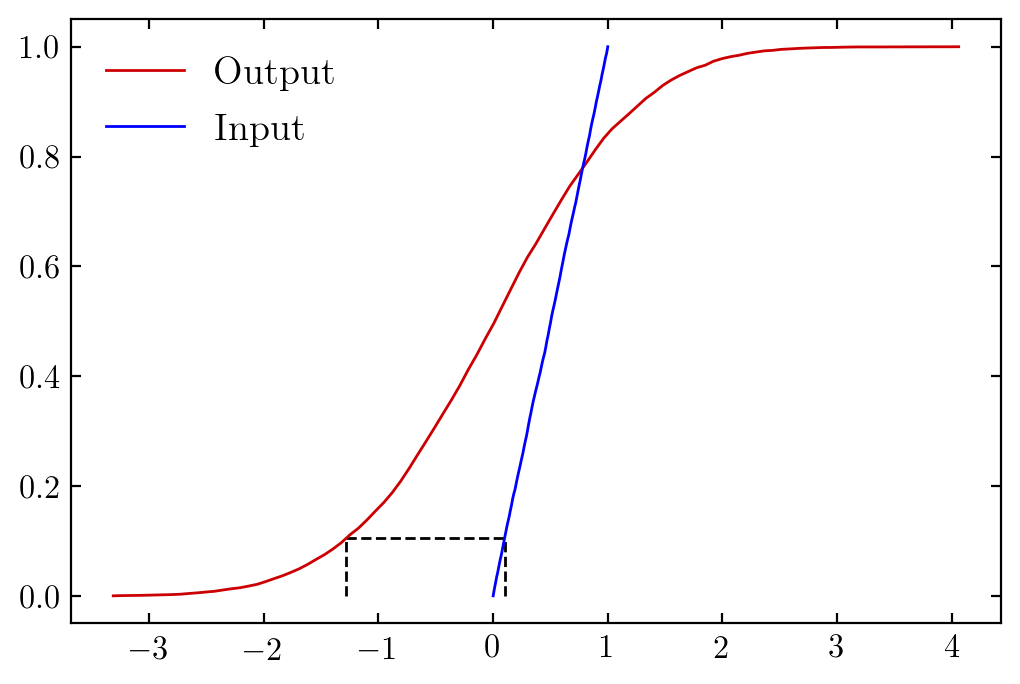

In [58]:
def p(size):
    return np.random.random(size=size)

def q(size):
    return np.random.normal(size=size)

input_dist = p(10000)
output_dist = q(10000)

# 1) construct a normalized CDF of the output distribution
hist_o, edges_o = np.histogram(output_dist, bins=100)
cdf_o = np.append(0, np.cumsum(hist_o))
cdf_o = cdf_o / cdf_o[-1]


hist_i, edges_i = np.histogram(input_dist, bins=100)
cdf_i = np.append(0, np.cumsum(hist_i))
cdf_i = cdf_i / cdf_i[-1]

_, ax = plt.subplots()
ax.plot(edges_o, cdf_o, label="Output")
ax.plot(edges_i, cdf_i, label="Input")
ax.legend()

# 2) construct a function that maps from 
f1 = scipy.interpolate.interp1d(edges_i, cdf_i) # get the cdf of the first dist
f2 = scipy.interpolate.interp1d(cdf_o, edges_o) # get the x value that corresponds to that cdf in the second dist

test = 0.1
print(f2(f1(test)))

cdf_p = f1(test)
x_q = f2(cdf_p)

ax.vlines(test, ymin=0, ymax=cdf_p, linestyle="--") # f1
ax.hlines(cdf_p, xmin=min(x_q, test), xmax=max(x_q, test), linestyle="--") # 
ax.vlines(x_q, ymin=0, ymax=cdf_p, linestyle="--")   # f2

#ax.axvline(0, ymax=0.5, color="green", ls="--")
#ax.axhline(0.5, xmax=0.5, xmin=0, color="green", ls="--")